In [1]:
deliveries = read.csv('IPL Ball-by-Ball 2008-2020.csv')


## Getting Prerequisite Libraries

In [2]:
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [3]:
head(deliveries)

id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
335982,1,7,4,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
summary(deliveries)

       id              inning           over             ball      
 Min.   : 335982   Min.   :1.000   Min.   : 0.000   Min.   :1.000  
 1st Qu.: 501227   1st Qu.:1.000   1st Qu.: 4.000   1st Qu.:2.000  
 Median : 729297   Median :1.000   Median : 9.000   Median :4.000  
 Mean   : 756769   Mean   :1.482   Mean   : 9.177   Mean   :3.616  
 3rd Qu.:1082628   3rd Qu.:2.000   3rd Qu.:14.000   3rd Qu.:5.000  
 Max.   :1237181   Max.   :2.000   Max.   :19.000   Max.   :9.000  
                                                                   
       batsman          non_striker                 bowler        batsman_runs 
 V Kohli   :  4609   S Dhawan :  4593   Harbhajan Singh:  3451   Min.   :0.00  
 S Dhawan  :  4208   V Kohli  :  4459   R Ashwin       :  3327   1st Qu.:0.00  
 RG Sharma :  4088   SK Raina :  4173   PP Chawla      :  3285   Median :1.00  
 SK Raina  :  4041   RG Sharma:  4139   A Mishra       :  3233   Mean   :1.24  
 DA Warner :  3819   G Gambhir:  3740   SL Malinga     :

## Most Runs Scored in IPL: 

In [5]:
max.runs = deliveries %>% group_by(batsman) %>% 
  summarise(Runs = sum(batsman_runs))

max.runs = arrange(max.runs, desc(Runs))

max.runs = max.runs[1:10, ]

max.runs 

batsman,Runs
V Kohli,5878
SK Raina,5368
DA Warner,5254
RG Sharma,5230
S Dhawan,5197
AB de Villiers,4849
CH Gayle,4772
MS Dhoni,4632
RV Uthappa,4607
G Gambhir,4217


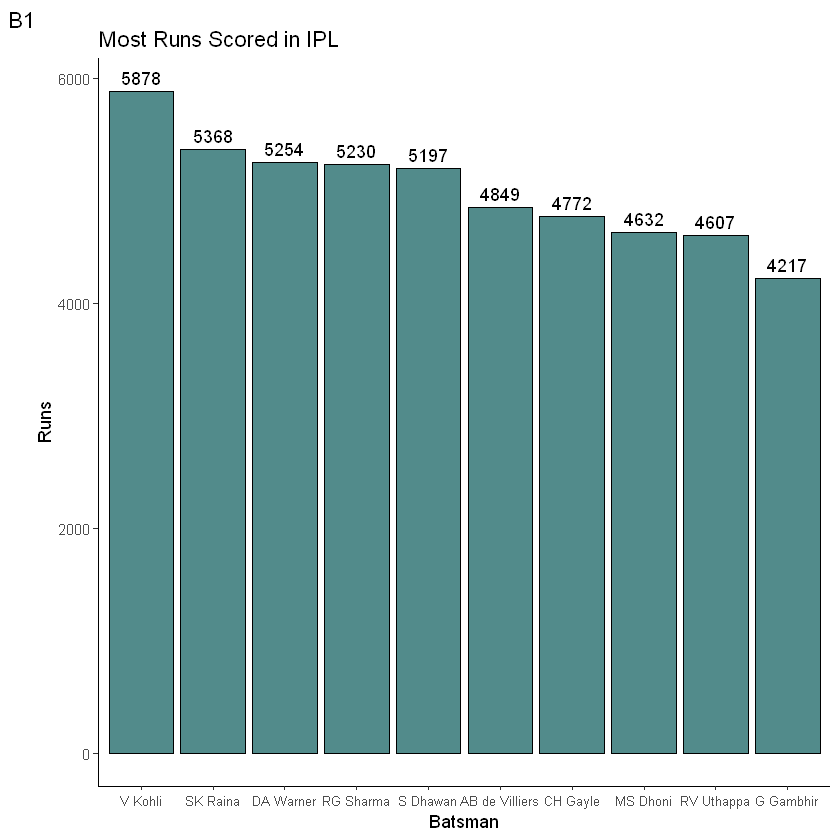

In [65]:
ggplot(max.runs, aes(reorder(batsman, -Runs), Runs)) + theme_classic()+
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black')+
  theme( axis.text.x = element_text(size = 8), legend.position = 'none')+ 
  geom_text(aes(label = Runs, vjust = -0.5))+
  labs(title = 'Most Runs Scored in IPL', x = 'Batsman',
      tag = 'B1')

## Most Sixes: 

In [8]:
most.sixes = deliveries %>% group_by(batsman) %>% filter(batsman_runs == 6) %>% 
  summarise(Sixes = n()) %>% arrange(desc(Sixes))

most.sixes = most.sixes[1:10, ]

most.sixes


batsman,Sixes
CH Gayle,349
AB de Villiers,235
MS Dhoni,216
RG Sharma,214
V Kohli,202
KA Pollard,198
DA Warner,195
SK Raina,194
SR Watson,190
RV Uthappa,163


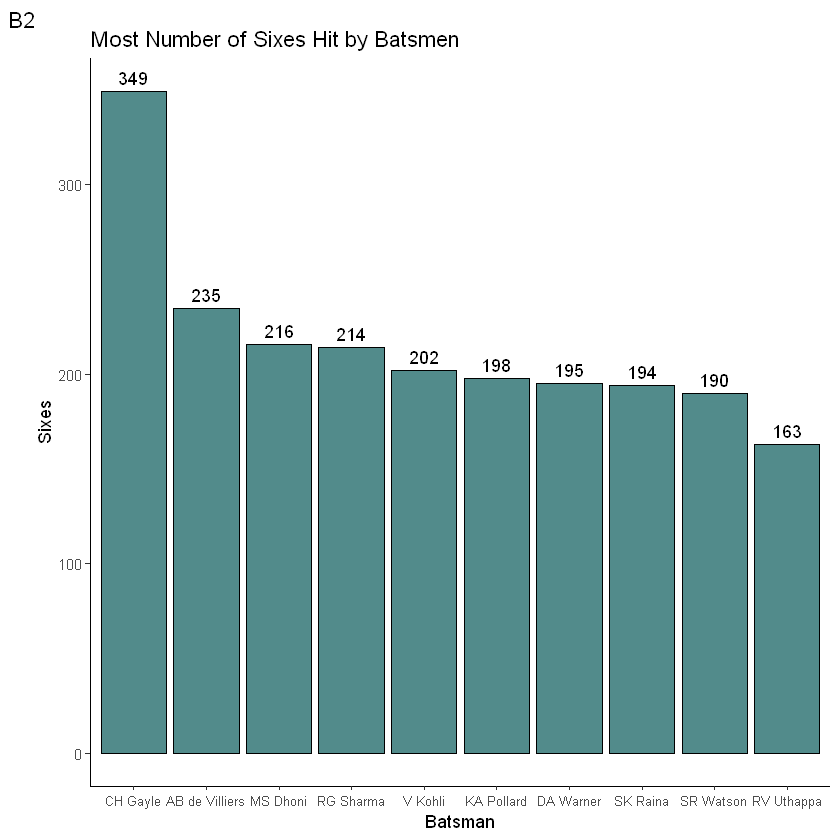

In [66]:
ggplot(most.sixes, aes(reorder(batsman, -Sixes), Sixes)) + theme_classic()+
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black')+ 
  theme( axis.text.x = element_text(size = 8), legend.position = 'none')+
  geom_text(aes(label = Sixes, vjust = -0.5))+
  labs(title = 'Most Number of Sixes Hit by Batsmen', x = 'Batsman', tag = 'B2')

## Most Fours: 

In [10]:
most.fours = deliveries %>% group_by(batsman) %>% filter(batsman_runs == 4) %>% 
  summarise(Fours = n()) %>% arrange(desc(Fours))

most.fours.top10 = most.fours[1:10, ] 

most.fours.top10

batsman,Fours
S Dhawan,591
DA Warner,510
V Kohli,504
SK Raina,493
G Gambhir,492
RG Sharma,458
RV Uthappa,454
AM Rahane,416
AB de Villiers,390
CH Gayle,384


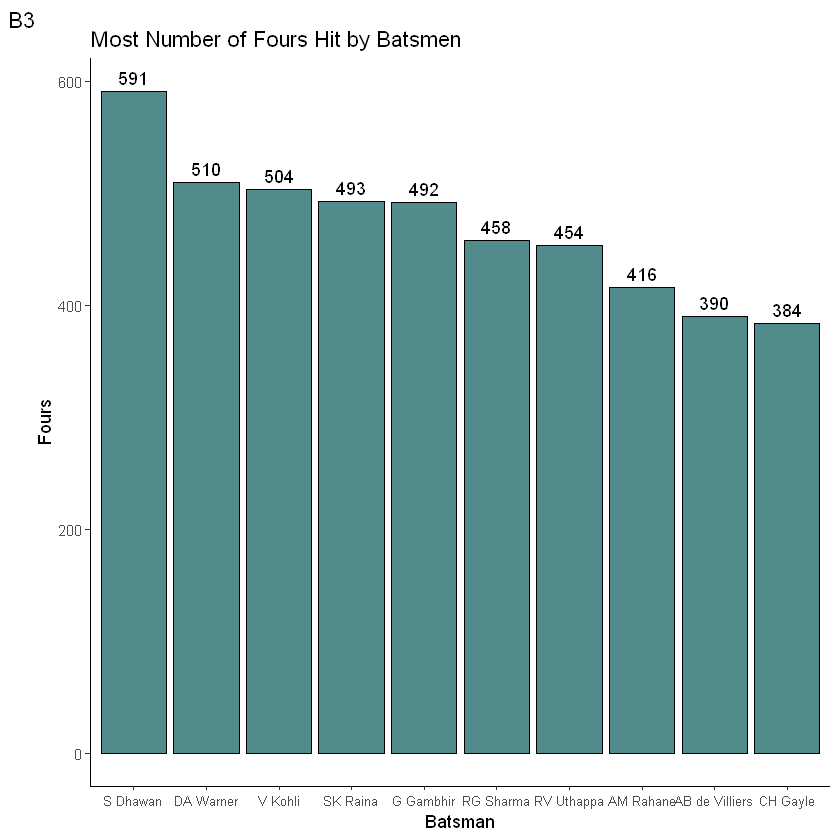

In [64]:
ggplot(most.fours.top10, aes(reorder(batsman, -Fours), Fours)) + theme_classic()+
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black')+ 
  theme( axis.text.x = element_text(size = 8), legend.position = 'none')+
  geom_text(aes(label = Fours, vjust = -0.5))+
  labs(title = 'Most Number of Fours Hit by Batsmen', x = 'Batsman',
      tag = 'B3')


## Max Strikerate (for minimum 2000 runs scored): 

In [14]:
max.strikerate = deliveries %>% group_by(batsman) %>% 
  summarise(Runs = sum(batsman_runs), Strike.rate = 
              round(sum( batsman_runs)/ n() * 100, digits = 2)) %>% 
  filter(Runs>= 2000) %>% arrange(desc(Strike.rate))

max.strikerate = max.strikerate[1:10, ]

max.strikerate$Strike.rate = paste0(max.strikerate$Strike.rate, '%')

max.strikerate

batsman,Runs,Strike.rate
V Sehwag,2728,148.83%
AB de Villiers,4849,148.56%
RR Pant,2079,146.82%
KA Pollard,3023,143.47%
CH Gayle,4772,142.79%
DA Warner,5254,137.58%
YK Pathan,3204,137.51%
SR Watson,3874,134.14%
AC Gilchrist,2069,133.05%
KL Rahul,2647,133.02%


In [15]:
options(warn = -1)

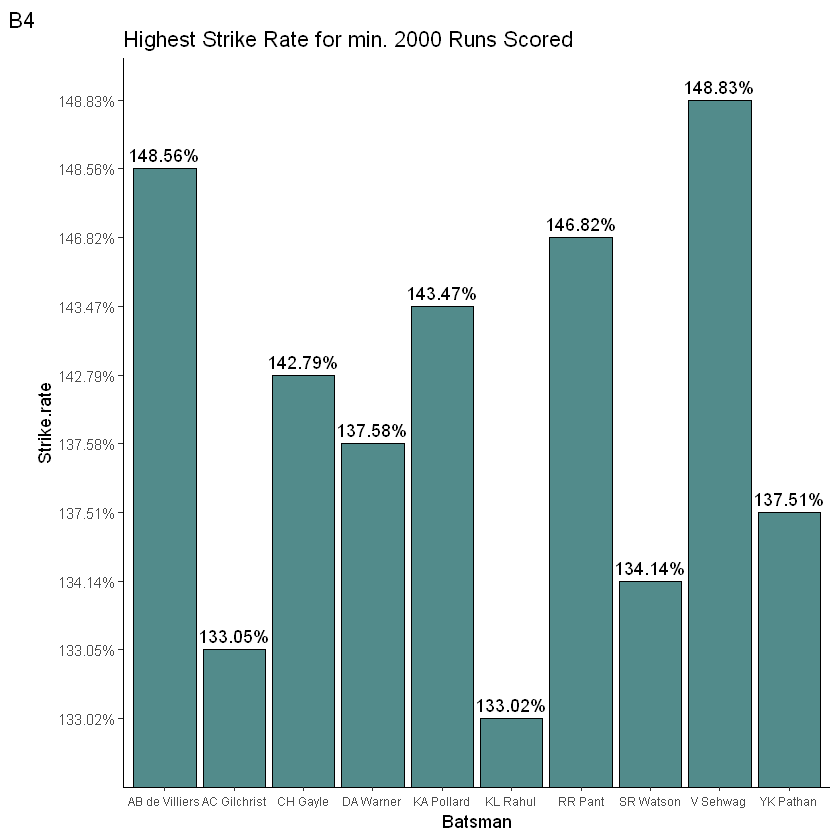

In [63]:
ggplot(max.strikerate, aes(reorder(batsman, Strike.rate), Strike.rate)) + 
  theme_classic() + 
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black')+
  geom_text(aes(label = Strike.rate, vjust = -0.5))+ 
  theme( axis.text.x = element_text(size = 7), legend.position = 'none')+
  labs(title = 'Highest Strike Rate for min. 2000 Runs Scored', x = 'Batsman',
       tag = 'B4')

## Highest Wicket Takers in IPL History

In [17]:
wks.most = deliveries %>% group_by(bowler) %>% filter(is_wicket == 1) %>% 
  summarise(wickets = n()) %>% arrange(desc(wickets))

wks.most = wks.most[1:10, ]  

wks.most

bowler,wickets
SL Malinga,188
DJ Bravo,175
A Mishra,169
PP Chawla,164
Harbhajan Singh,161
R Ashwin,153
B Kumar,146
SP Narine,143
UT Yadav,137
R Vinay Kumar,127


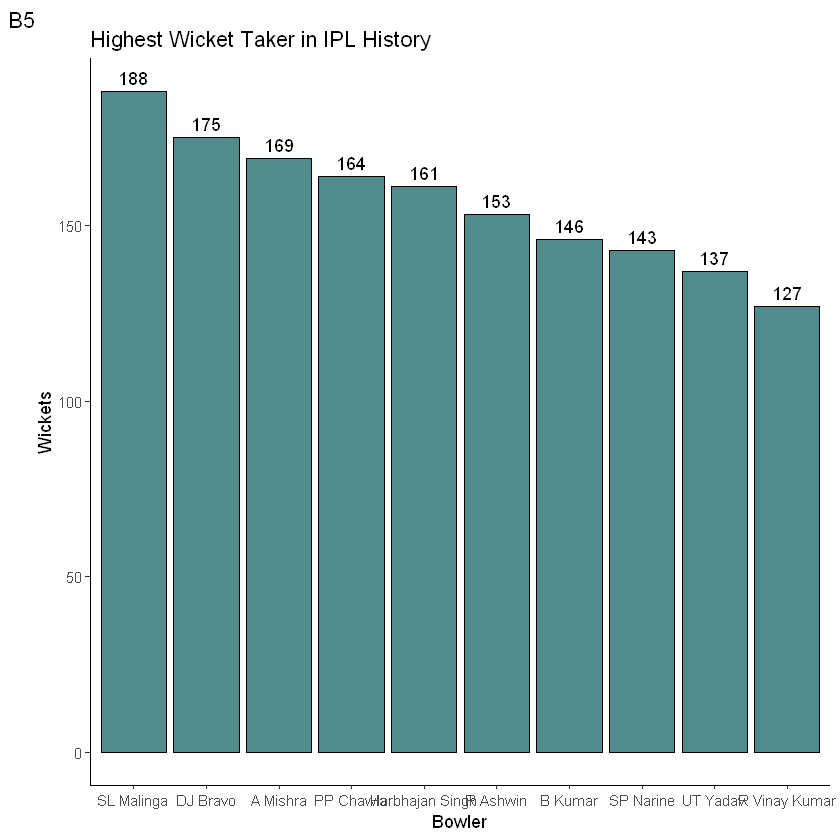

In [18]:
ggplot(wks.most, aes(reorder( bowler, -wickets), wickets)) + theme_classic()+
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black')+
  geom_text(aes(label = wickets, vjust = -0.5))+ 
  theme(legend.position = 'none')+
  labs(title = 'Highest Wicket Taker in IPL History', x = 'Bowler',
       y = 'Wickets', tag = 'B5')

## Best Economy rate for bowlers who bowled min 125 overs(750 balls):

In [20]:
best.eco = deliveries %>% group_by(bowler) %>% 
  summarise(deliveries = n(), Eco.rate= round((sum(total_runs)/ n())*6, 
                                              digits = 2)) %>%
  filter(deliveries >= 750) %>% arrange(Eco.rate)

best.eco = best.eco[1:10, ]

best.eco  

bowler,deliveries,Eco.rate
Rashid Khan,1490,6.33
A Kumble,983,6.65
M Muralitharan,1577,6.68
DW Steyn,2276,6.77
R Ashwin,3327,6.77
SP Narine,2824,6.82
DL Vettori,785,6.83
Harbhajan Singh,3451,7.02
SL Malinga,2974,7.03
JC Archer,858,7.05


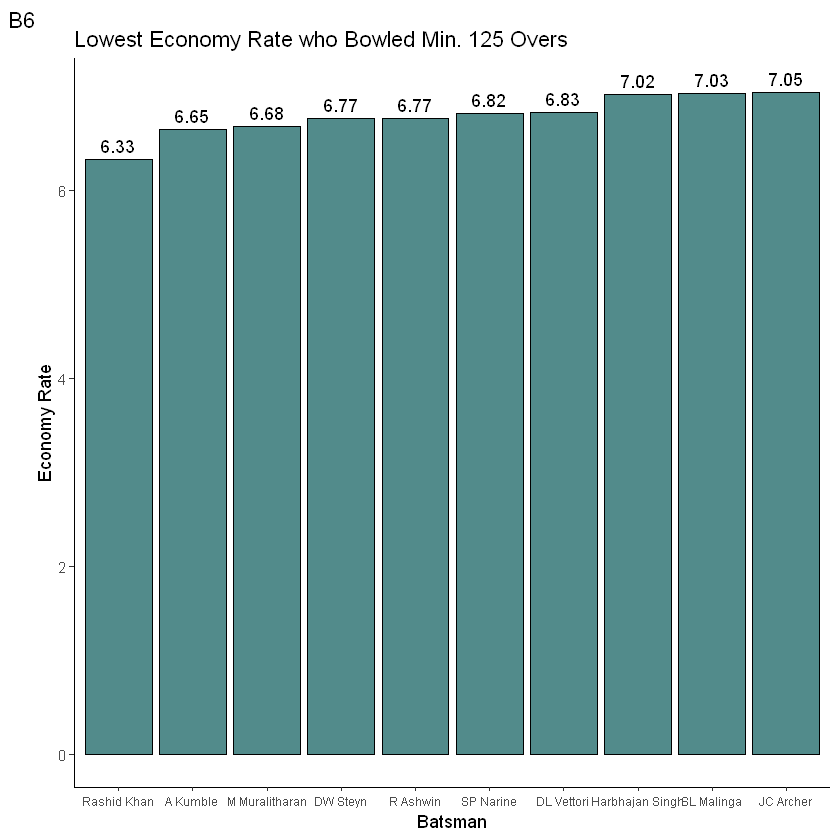

In [62]:
ggplot(best.eco, aes(reorder(bowler, Eco.rate), Eco.rate)) + theme_classic()+ 
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black')+ 
  theme( axis.text.x = element_text(size = 7), legend.position = 'none')+
  geom_text(aes(label = Eco.rate, vjust = -0.5))+
  labs(title = 'Lowest Economy Rate who Bowled Min. 125 Overs', x = 'Batsman',
       tag = 'B6', y = 'Economy Rate')

## Most Runs Scores in Powerplay Overs(1-6): 

In [22]:
bat.pp.runs= deliveries %>% group_by(batsman) %>% 
  filter(over >= 0 & over <= 5) %>% 
  summarise(Runs = sum(total_runs)) %>% arrange(desc(Runs))

bat.pp.runs = bat.pp.runs[1:10, ]

bat.pp.runs

batsman,Runs
S Dhawan,2783
DA Warner,2738
CH Gayle,2467
G Gambhir,2457
PA Patel,2049
AM Rahane,2046
RV Uthappa,1961
V Kohli,1795
V Sehwag,1711
BB McCullum,1688


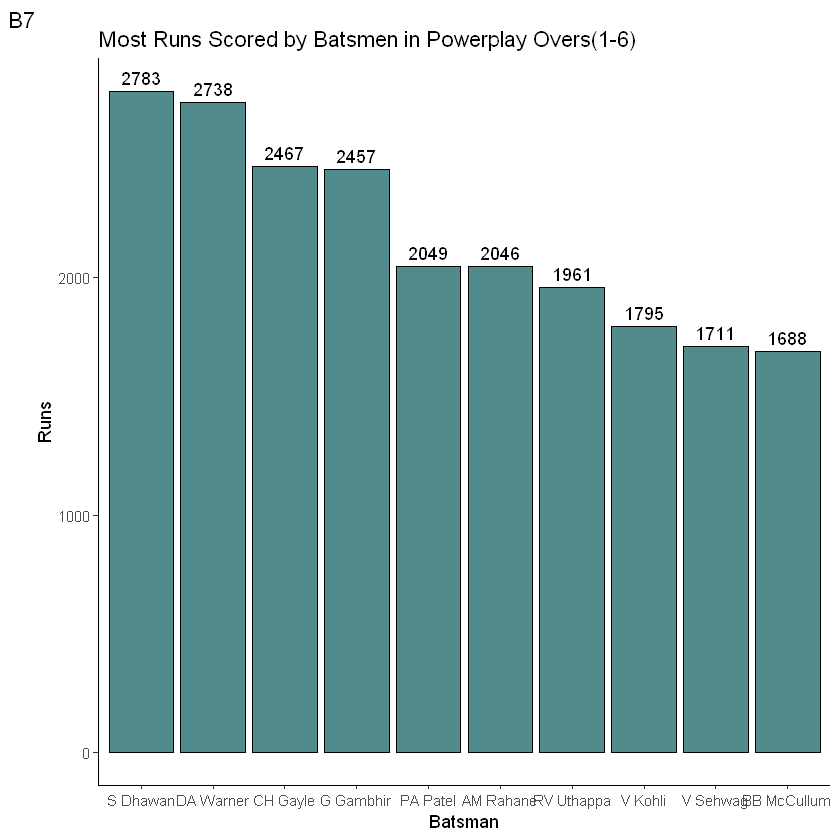

In [24]:
ggplot(bat.pp.runs, aes(reorder(batsman, -Runs), Runs)) + theme_classic()+
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black')+
  geom_text(aes(label = Runs, vjust = -0.5))+
  labs(title = 'Most Runs Scored by Batsmen in Powerplay Overs(1-6)',
       x = 'Batsman', tag = 'B7')

## Most Runs Scored in Death Overs(16-20):

In [25]:
bat.do = deliveries %>% group_by(batsman) %>% 
  filter(over >= 15 & over <=19) %>% 
  summarise(Runs = sum(total_runs)) %>% arrange(desc(Runs))

bat.do = bat.do[1:11, ]

bat.do

batsman,Runs
MS Dhoni,2906
KA Pollard,1882
AB de Villiers,1726
RG Sharma,1524
V Kohli,1318
KD Karthik,1218
YK Pathan,1181
RA Jadeja,1172
HH Pandya,1011
AT Rayudu,972


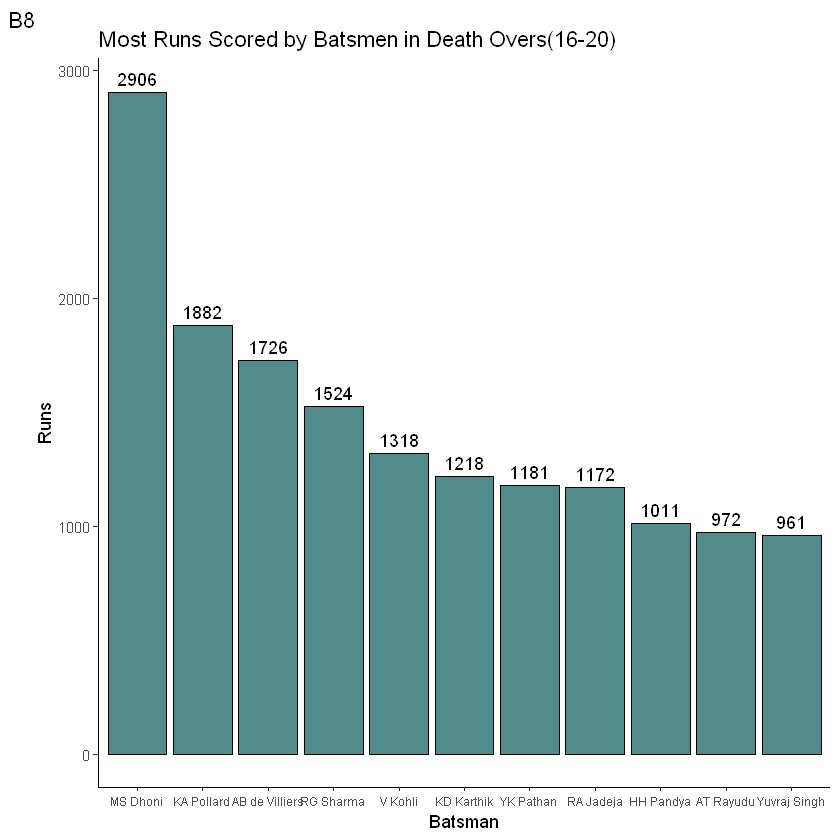

In [59]:
ggplot(bat.do, aes(reorder(batsman, -Runs), Runs))+ theme_classic()+
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black')+
  geom_text(aes(label = Runs, vjust = -0.5))+
  theme( axis.text.x = element_text(size = 7), legend.position = 'none')+
  labs(title = 'Most Runs Scored by Batsmen in Death Overs(16-20)',
       x = 'Batsman', tag = 'B8')

## Most Wickets Taken in Powerplay Overs(1-6):

In [27]:
ball.pp.wks = deliveries %>% group_by(bowler) %>% 
  filter(over >= 0 & over <=5) %>% filter(is_wicket == 1) %>% 
  summarise(Wickets =n()) %>% arrange(desc(Wickets))

ball.pp.wks = ball.pp.wks[1:10, ]

ball.pp.wks

bowler,Wickets
Z Khan,58
Sandeep Sharma,54
B Kumar,53
UT Yadav,47
DS Kulkarni,46
A Nehra,45
R Ashwin,45
I Sharma,44
P Kumar,44
SL Malinga,40


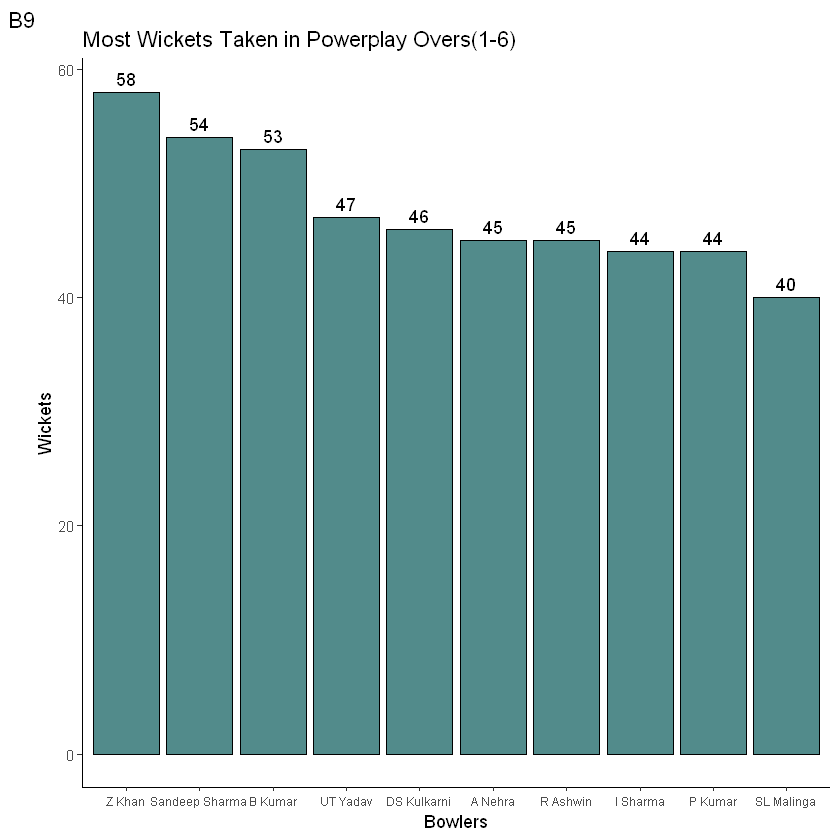

In [57]:
ggplot(ball.pp.wks, aes(reorder(bowler,-Wickets), Wickets))+ theme_classic()+
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black')+
  geom_text(aes(label = Wickets, vjust = -0.5))+ 
  theme( axis.text.x = element_text(size = 7), legend.position = 'none')+
  labs(title = 'Most Wickets Taken in Powerplay Overs(1-6)',
       x ='Bowlers', tag = 'B9')

## Most Wickets Taken in Death Overs(16-20):

In [29]:
ball.do.wks = deliveries %>% group_by(bowler) %>% 
  filter(over >= 15 & over <=19) %>% filter(is_wicket == 1) %>% 
  summarise(Wickets =n()) %>% arrange(desc(Wickets))

ball.do.wks = ball.do.wks[1:10, ]

ball.do.wks

bowler,Wickets
SL Malinga,122
DJ Bravo,108
B Kumar,83
JJ Bumrah,69
SP Narine,68
A Nehra,63
R Vinay Kumar,62
UT Yadav,62
DW Steyn,55
RP Singh,55


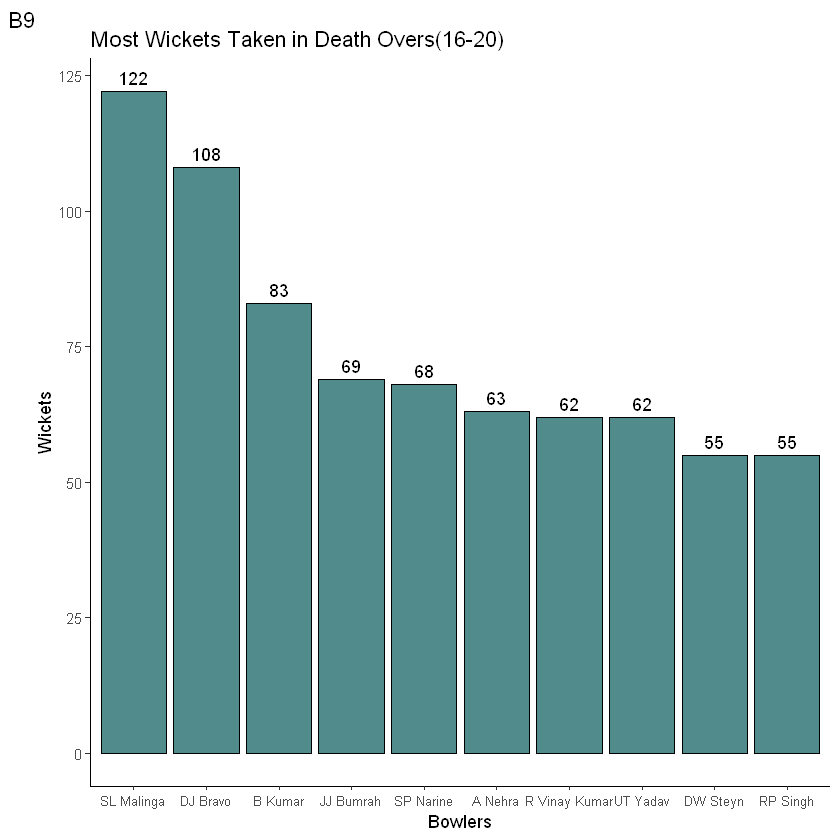

In [53]:
ggplot(ball.do.wks, aes(reorder(bowler,-Wickets), Wickets)) + theme_classic()+
  geom_bar( stat = 'identity', fill = 'darkslategray4', col = 'black')+
  geom_text( aes( label = Wickets, vjust = -0.5))+ 
  theme( axis.text.x = element_text(size = 8), legend.position = 'none')+
  labs(title = 'Most Wickets Taken in Death Overs(16-20)',
       x ='Bowlers', tag = 'B9')

## Most Wickets Taken in Middle Overs(7-15):

In [31]:
ball.mo.wks = deliveries %>% group_by(bowler) %>% 
  filter(over >= 6 & over <=14) %>% filter(is_wicket == 1) %>% 
  summarise(Wickets =n()) %>% arrange(desc(Wickets))

ball.mo.wks = ball.mo.wks[1:10, ]

ball.mo.wks

bowler,Wickets
A Mishra,122
PP Chawla,107
Harbhajan Singh,101
RA Jadeja,86
YS Chahal,82
R Ashwin,76
PP Ojha,66
R Bhatia,61
AR Patel,59
Rashid Khan,59


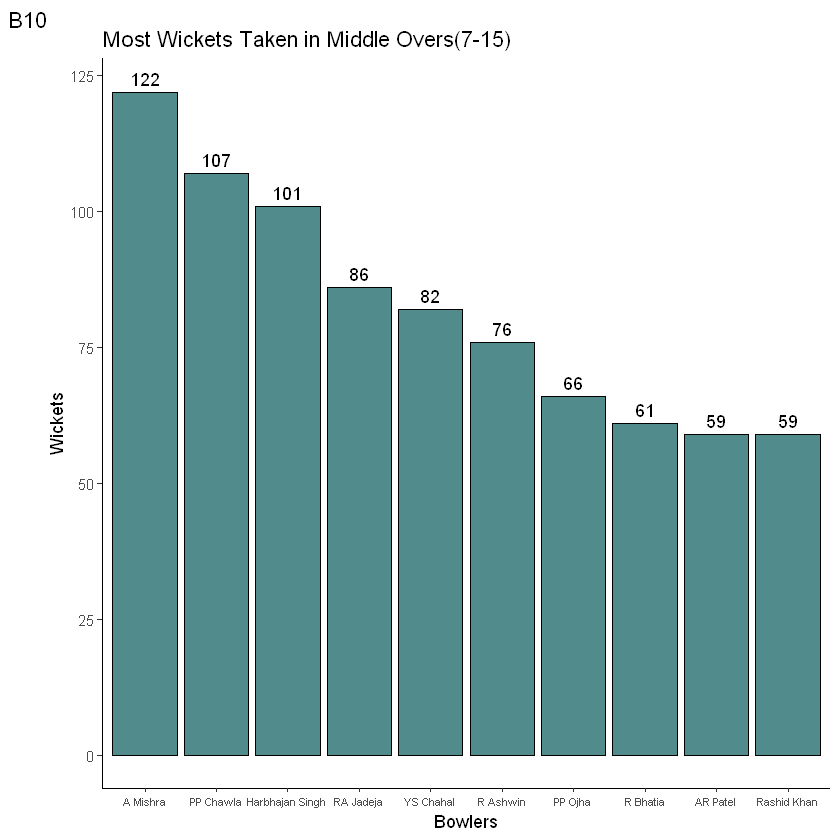

In [49]:
ggplot(ball.mo.wks, aes(reorder(bowler,-Wickets), Wickets))+ theme_classic()+
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black')+
  geom_text(aes(label = Wickets, vjust = -0.5))+ 
  theme(legend.position = 'none', axis.text.x = element_text(size = 6.75)) + 
labs(title = 'Most Wickets Taken in Middle Overs(7-15)',
       x ='Bowlers', tag = 'B10')